<a href="https://colab.research.google.com/github/vincentjunitio00/Heart_Disease_Clustering/blob/main/Heart_Disease_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
!git clone https://github.com/vincentjunitio00/Heart_Disease_Clustering

Cloning into 'Heart_Disease_Clustering'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [5]:
def preprocessing(file):
  file = open(file, "r")

  counter = 0
  records = ''
  dataset = []
  for record in file.readlines():
    records += record.rstrip('\n') + ' '
    counter += 1
    if counter >= 10:
      dataset.append(records.rstrip())
      records = ''
      counter = 0
  return dataset

In [6]:
dataset_cleveland = preprocessing('/content/Heart_Disease_Clustering/cleveland.data')
dataset_hungarian = preprocessing('/content/Heart_Disease_Clustering/hungarian.data')
dataset_longbeach = preprocessing('/content/Heart_Disease_Clustering/long-beach-va.data')
dataset_switzer = preprocessing('/content/Heart_Disease_Clustering/switzerland.data')

In [7]:
used_columns = [0, 2, 3, 40, 17, 15, 4, 50, 11, 9, 37, 31]
used_columns_name = {0: 'id', 2: 'age', 3: 'sex', 40: 'slope', 17: 'famhist', 15:'fbs', 4:'painloc', 50: 'thal', 11: 'chol', 9: 'trestbps', 37: 'exang', 31: 'thalach'}

# Repeat here

In [8]:
df_cleveland = pd.DataFrame([data.split() for data in dataset_cleveland])
df_used_cleveland = df_cleveland[used_columns].rename(columns=used_columns_name)

f = open('/content/Heart_Disease_Clustering/processed.cleveland.data', 'r')
preprocessed_columns_name = {0:'age', 1: 'sex', 2: 'cp', 3: 'trestbps', 4: 'chol', 5: 'fbs', 6: 'restecg', 7: 'thalach', 8: 'exang', 9: 'oldpeak', 10: 'slope', 11: 'ca', 12: 'thal', 13: 'num'}

df_preprocessed_cleveland = pd.DataFrame([data.rstrip('\n').split(',') for data in f.readlines()]).rename(columns=preprocessed_columns_name)

df_used_cleveland['num'] = df_preprocessed_cleveland['num']

In [9]:
df_hungarian = pd.DataFrame([data.split() for data in dataset_hungarian])
df_used_hungarian = df_hungarian[used_columns].rename(columns=used_columns_name)

f = open('/content/Heart_Disease_Clustering/reprocessed.hungarian.data', 'r')
df_preprocessed_hungarian = pd.DataFrame([data.rstrip('\n').split(' ') for data in f.readlines()]).rename(columns=preprocessed_columns_name)

df_used_hungarian['num'] = df_preprocessed_hungarian['num']

In [10]:
df_longbeach = pd.DataFrame([data.split() for data in dataset_longbeach])
df_used_longbeach = df_longbeach[used_columns].rename(columns=used_columns_name)

f = open('/content/Heart_Disease_Clustering/processed.va.data', 'r')
preprocessed_columns_name = {0:'age', 1: 'sex', 2: 'cp', 3: 'trestbps', 4: 'chol', 5: 'fbs', 6: 'restecg', 7: 'thalach', 8: 'exang', 9: 'oldpeak', 10: 'slope', 11: 'ca', 12: 'thal', 13: 'num'}

df_preprocessed_longbeach = pd.DataFrame([data.rstrip('\n').split(',') for data in f.readlines()]).rename(columns=preprocessed_columns_name)
df_used_longbeach['num'] = df_preprocessed_longbeach['num']

In [11]:
df_switzer = pd.DataFrame([data.split() for data in dataset_switzer])
df_used_switzer = df_switzer[used_columns].rename(columns=used_columns_name)

f = open('/content/Heart_Disease_Clustering/processed.switzerland.data', 'r')
df_preprocessed_switzerland = pd.DataFrame([data.rstrip('\n').split(',') for data in f.readlines()]).rename(columns=preprocessed_columns_name)

df_used_switzerland = df_used_switzer.merge(df_preprocessed_switzerland, how='inner', on=['age', 'trestbps', 'thalach'], suffixes=('','_y'))
df_used_switzerland = df_used_switzerland[['id','age','sex','slope','famhist','fbs','painloc','thal','chol','trestbps','exang','thalach','num']]

In [63]:
df = df_used_cleveland.append([df_used_hungarian, df_used_longbeach, df_used_switzerland]).reset_index(drop=True)

In [64]:
df

,id,age,sex,slope,famhist,fbs,painloc,thal,chol,trestbps,exang,thalach,num
0,1,63,1,3,1,1,-9,6,233,145,0,150,0
1,2,67,1,2,1,0,-9,3,286,160,1,108,2
2,3,67,1,2,1,0,-9,7,229,120,1,129,1
3,4,37,1,3,1,0,-9,3,250,130,0,187,0
4,6,41,0,1,1,0,-9,3,204,130,0,172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,4070,54,1,2,-9,-9,1,7,0,180,0,150,1
893,4071,56,1,2,-9,1,1,7,0,125,1,103,3
894,4072,56,1,2,-9,-9,0,7,0,125,0,98,2
895,4073,54,1,2,-9,-9,1,7,0,130,1,110,3


Slope (category) -9 ubah jadi 0

In [65]:
df = df.astype('int')

In [66]:
df['slope'] = df['slope'].replace(-9, 0)

Famhist -9 ubah jadi 2 karena tidak tahu -9 mengarah kemana

In [67]:
df['famhist'] = df['famhist'].replace(-9, 2)

In [68]:
df['famhist'].value_counts()

2    420
1    269
0    208
Name: famhist, dtype: int64

Karena fbs -9 sedikit saja, jadi masuk ke 0

In [69]:
df['fbs'] = df['fbs'].replace(-9, 0)

karena painloc (category) -9 banyak, jadi buat category baru yaitu 2

In [70]:
df['painloc'] = df['painloc'].replace(-9, 2)

In [71]:
df['painloc'].value_counts()

1    566
2    282
0     49
Name: painloc, dtype: int64

In [72]:
df['thal'] = df['thal'].replace({-9 : 0, 1: 3, 2: 3, 4: 6, 5: 6})

In [73]:
df['thal']

0      6
1      3
2      7
3      3
4      3
      ..
892    7
893    7
894    7
895    7
896    7
Name: thal, Length: 897, dtype: int64

Replace -9 chol value to chol.median()

In [74]:
df['chol'] = df['chol'].replace(-9, df['chol'].median())

Replace -9 trestbps value to trestbps.median()

In [75]:
df['trestbps'] = df['trestbps'].replace(-9, df['trestbps'].median())

Karena exang -9 sedikit, jadi ubah ke 0

In [76]:
df['exang'] = df['exang'].replace(-9, 0)

ubah -9 thalach jadi median juga

In [77]:
df['thalach'] = df['thalach'].replace(-9, df['thalach'].median())

In [78]:
df

,id,age,sex,slope,famhist,fbs,painloc,thal,chol,trestbps,exang,thalach,num
0,1,63,1,3,1,1,2,6,233,145,0,150,0
1,2,67,1,2,1,0,2,3,286,160,1,108,2
2,3,67,1,2,1,0,2,7,229,120,1,129,1
3,4,37,1,3,1,0,2,3,250,130,0,187,0
4,6,41,0,1,1,0,2,3,204,130,0,172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,4070,54,1,2,2,0,1,7,0,180,0,150,1
893,4071,56,1,2,2,1,1,7,0,125,1,103,3
894,4072,56,1,2,2,0,0,7,0,125,0,98,2
895,4073,54,1,2,2,0,1,7,0,130,1,110,3


ubah ke category

In [83]:
df[['sex', 'slope', 'famhist', 'fbs', 'painloc', 'thal', 'exang']] = df[['sex', 'slope', 'famhist', 'fbs', 'painloc', 'thal', 'exang']].astype('category')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        897 non-null    int64   
 1   age       897 non-null    int64   
 2   sex       897 non-null    category
 3   slope     897 non-null    category
 4   famhist   897 non-null    category
 5   fbs       897 non-null    category
 6   painloc   897 non-null    category
 7   thal      897 non-null    category
 8   chol      897 non-null    int64   
 9   trestbps  897 non-null    int64   
 10  exang     897 non-null    category
 11  thalach   897 non-null    int64   
 12  num       897 non-null    int64   
dtypes: category(7), int64(6)
memory usage: 49.2 KB


In [198]:
X = df.drop(['id', 'num'], axis=1)

In [199]:
y = df['num'].values

First Method

In [200]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [202]:
prediction = kmeans.labels_

In [142]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


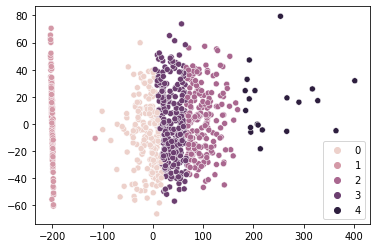

In [203]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=prediction)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


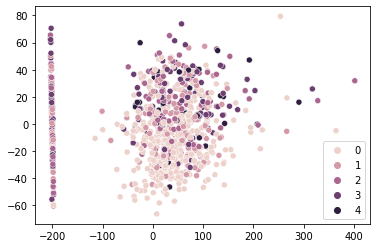

In [205]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], df['num'])
plt.legend()

In [234]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

print(confusion_matrix(df['num'].values, prediction))
print(accuracy_score(df['num'].values, prediction))
print(recall_score(df['num'].values, prediction, average='macro'))
print(precision_score(df['num'].values, prediction, average='macro'))

[[118  21  92 165   8]
 [ 31  62  39  58   1]
 [ 11  46  24  44   5]
 [ 16  36  37  38   3]
 [  7   6  14  12   3]]
0.2731326644370123
0.2330076372230745
0.2787521027976471


In [216]:
pca_3 = PCA(n_components = 3)
X_pca_3 = pca_3.fit_transform(X)
kmeans_3 = KMeans(n_clusters = 5, random_state=42)
kmeans_3.fit(X_pca_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [218]:
prediction_3 = kmeans_3.labels_

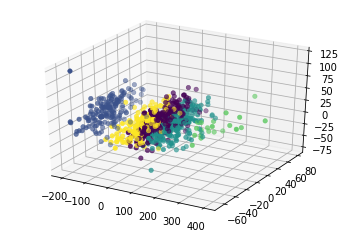

In [224]:
ax = plt.axes(projection='3d')
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=prediction_3, cmap='viridis', linewidth=0.5)

In [226]:
kmeans_elkan = KMeans(n_clusters = 5, random_state=42, algorithm='elkan')
kmeans_elkan.fit(X_pca)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [227]:
prediction_elkan = kmeans_elkan.labels_

In [231]:
print(confusion_matrix(df['num'].values, prediction_elkan))
print(accuracy_score(df['num'].values, prediction_elkan))
print(recall_score(df['num'].values, prediction_elkan, average='micro'))
print(precision_score(df['num'].values, prediction_elkan, average='micro'))

[[118  21  92 165   8]
 [ 31  62  39  58   1]
 [ 11  46  24  44   5]
 [ 16  36  37  38   3]
 [  7   6  14  12   3]]
0.2731326644370123
0.2731326644370123
0.2731326644370123


In [232]:
kmeans_full = KMeans(n_clusters = 5, random_state=42, algorithm='full')
kmeans_full.fit(X_pca)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [233]:
prediction_full = kmeans_full.labels_

print(confusion_matrix(df['num'].values, prediction_full))
print(accuracy_score(df['num'].values, prediction_full))
print(recall_score(df['num'].values, prediction_full, average='micro'))
print(precision_score(df['num'].values, prediction_full, average='micro'))

[[118  21  92 165   8]
 [ 31  62  39  58   1]
 [ 11  46  24  44   5]
 [ 16  36  37  38   3]
 [  7   6  14  12   3]]
0.2731326644370123
0.2731326644370123
0.2731326644370123
